
Build a non-linear SVM classifier to classify emails and compare the performance with the linear SVM model.

# Data  UnderStanding

we will build a non-linear model (using non-linear kernels) and then find the optimal hyperparameters (the choice of kernel, C, gamma).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

In [32]:
email=pd.read_csv("Spam.txt",sep=",",header=None)
email
email.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...   char_freq_;  char_freq_(  \
0             0.00            0.00  ...          0.00        0.000   


# Data  Preparation

In [33]:
X=email.drop("spam",axis=1)

In [34]:
y=email.spam.values.astype(int)

# Scaling features
X_scaled=scale(X)

#test train Split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=4)

# Model BUilding

In [35]:
# Using rbf kernel, C=1, default value of gamma

model=SVC(C=1,kernel="rbf")

# fit
model.fit(X_train,y_train)

# predict 
y_pred=model.predict(X_test)

In [36]:
# Confusion Matrix
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[811,  38],
       [ 61, 471]], dtype=int64)

In [38]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))
print("precesion",metrics.precision_score(y_test,y_pred))
print("recall",metrics.recall_score(y_test,y_pred))

accuracy 0.9283128167994207
precesion 0.925343811394892
recall 0.8853383458646616


# Hyper Parameter Tuning

In [39]:
# 1. gamma
# 2. C 
# 3. choice of kernel(linear,rbf,etc)


We use ``` GridSearchCV()``` for hyperparameter tuning 

## GridSearch to find Optimal Hyperparameters

In [41]:
# using RBf kernel to find optimal C and gamma

In [43]:
# Creating Folds
folds=KFold(n_splits=5,random_state=4,shuffle=True)
# specify the range of hyperparameters
hyper_params=[{"gamma":[1e-2,1e-3,1e-4],"C":[1,10,100,1000]}]

In [44]:
# Specify model
model=SVC(kernel="rbf")
# set up Gridsearch
model_cv=GridSearchCV(estimator=model,cv=folds,param_grid=hyper_params,scoring="accuracy",verbose=1,return_train_score=True)
# fit
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   46.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [47]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

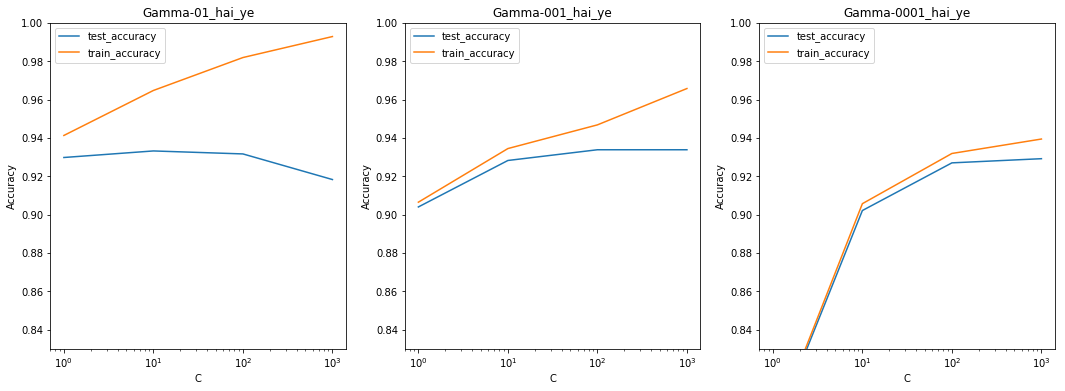

In [58]:
# Ploting Graphically :
plt.figure(figsize=(18,6))

# subplot
plt.subplot(131)
gamma_01=cv_results[cv_results.param_gamma==0.01]

plt.plot(gamma_01.param_C,gamma_01.mean_test_score)
plt.plot(gamma_01.param_C,gamma_01.mean_train_score)
plt.xlabel("C")
plt.ylabel('Accuracy')
plt.title("Gamma-01_hai_ye")
plt.legend(["test_accuracy","train_accuracy"],loc="upper left")
plt.ylim([0.83,1])
plt.xscale("log")


plt.subplot(132)
gamma_001=cv_results[cv_results.param_gamma==0.001]

plt.plot(gamma_001.param_C,gamma_001.mean_test_score)
plt.plot(gamma_001.param_C,gamma_001.mean_train_score)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma-001_hai_ye")
plt.ylim([0.83,1])
plt.legend(["test_accuracy","train_accuracy"],loc="upper left")
plt.xscale("log")


plt.subplot(133)
gamma_0001=cv_results[cv_results.param_gamma==0.0001]

plt.plot(gamma_0001.param_C,gamma_0001.mean_test_score)
plt.plot(gamma_0001.param_C,gamma_0001.mean_train_score)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma-0001_hai_ye")
plt.ylim([0.83,1])
plt.legend(["test_accuracy","train_accuracy"],loc="upper left")
plt.xscale("log")
plt.show()

This plot reveals some interesting insights:
- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99% 
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*


In [59]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9338509316770186 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


In [60]:
# Best MOdel
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.0001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[810  39]
 [ 60 472]] 

accuracy 0.9283128167994207
precision 0.923679060665362
sensitivity/recall 0.8872180451127819


## Conclusion

The accuracy achieved using a non-linear kernel is comparable to that of a linear one. Thus, it turns out that for this problem, **we do not really need a non-linear kernel**.